### Opdracht Covid data analyseren met Python

Jullie hebben tot noch toe de Python code uitgevoerd in de sandbox van de cursusomgeving. Er zijn echter veel manieren waarop Pythoncode kan worden uitgevoerd. Wanneer je Python op je eigen laptop installeert (bijvoorbeeld de <a href='www.anaconda.com'>Anaconda</a> distributie) dan krijg je de mogelijkheid om Python uit te voeren op een commandline of in een vrij eenvoudige editor, IDLE. Ook in SPSS kun je Pythoncode uitvoeren. Veel data scientists gebruiken, zeker in de fase van exploratory data analysis (EDA) Jupyter notebooks als omgeving om interactief met data en python aan de slag te gaan.

Een Jupyter Notebook bestaat uit cellen die óf code of óf opgemaakte tekst bevatten (mark-up). De code kan worden uitgevoerd, de mark-up cellen worden gebruikt om notities te maken en de geschreven code uit te leggen.

### Werken met Jupyter Notebooks

Om te kunnen werken met Jupyter notebooks moet je een paar dingen weten. Alles wat in een notebook staat, staat in een cel. Een cel kun je runnen door shift+enter in te toetsen. Bij een code-cel zal dan de code worden uitgevoerd, bij een mark-up cel zal de tekst keurig worden opgemaakt. Wanneer je dubbelklikt op een mark-up cel zie je de bron-code. Probeer dat maar eens bij deze tekst. Je ziet dan bijvoorbeeld dat een kopje gemaakt kan worden met #-tekens. Voor een uitgebreide beschrijving van wat er met mark-up mogelijk is kun je <a href="https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">hier</a> kijken.

Standaard is een cel een code-cel. Wil er een mark-up cel van maken dan moet je de cel selecteren en er dan voor zorgen dat er geen cursor knippert in de cel. Wanneer de cursor wel knippert kun je op escape drukken. Wanneer je vervolgens op de M drukt verandert de code-cel in een mark-up cel. Wanneer je van een mark-up cel een code-cel wilt maken gebruik de Y-toets.

Wanneer je een cel uitvoert met shift+enter zal de eerstvolgende cel geselecteerd worden. Voer je op deze wijze de laatste cel uit dan zal een een nieuwe cel worden toegevoegd. Wanneer je een nieuwe cel voor de huidige cel wilt invoegen, dan gebruik je daarvoor de A-toets voor het invoegen van een nieuwe cel na de huidige cel gebruik je de B-toets.

### De opdracht

Jullie gaan bij deze opdracht een covid dataset exploreren (EDA). Het RIVM publiceert dagelijks de ruwe cijfers rondom Covid. Deze data is te vinden op: <a href="https://data.rivm.nl/covid-19/">https://data.rivm.nl/covid-19/</a>. De brondata voor deze opdracht komt uit het bestand COVID-19_aantallen_gemeente_per_dag.csv. Daarin staat per gemeente per dag het aantal besmettingen, aantal opgenomen patiënten en aantal sterfgevallen. Dat is heel veel data en in die vorm niet geschikt voor een inleidende opdracht. Daarom gaan jullie aan de slag met de data voor één dag (7 december) en is de data geaggregeerd naar provincie-niveau.

De RIVM-data is verrijkt met data van het CBS (de <a href="https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=70072ned&_theme=236">Regionale kerncijfers</a> en <a href="https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2020">oppervlaktes per gemeente</a>) ook die data is geaggregeerd naar provincie-niveau.

Hoewel er voor het bewerken en analyseren van data in Python uitgebreide code bibliotheken beschikbaar zijn (bijv. <a href="pandas.pydata.org">Pandas</a>) zullen we hier werken met Python lijsten omdat jullie daar al kennis mee hebben gemaakt bij de introductiecursus.

We beginnen in de code-cel hieronder met het definiëren van de Python lists die de data bevatten. Deze cel moet uitgevoerd worden (shift+enter) om de data aan de variabelen te koppelen. Alle lijsten zijn op dezelfde volgorde geordend, de eerste waarde van elke lijst heeft betrekking op Drenthe enz.

In [18]:
# list met namen van de provincies
prv_naam = ['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen', 'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel', 'Utrecht', 'Zeeland', 'Zuid-Holland']
# list met afkorten van de provincies
prv_afk = ['DR', 'FL', 'FR', 'GE', 'GR', 'LI', 'NB', 'NH', 'OV', 'UT', 'ZE', 'ZH']
# list met aantal positief gestest personen per provincie
prv_positief = [91, 213, 150, 826, 224, 567, 1138, 994, 637, 508, 93, 1652]
# list met aantal opgenomen covid-patiënten per provincie
prv_opgenomen = [3, 4, 0, 3, 0, 3, 7, 12, 6, 5, 2, 29]
# list met aantal overleden personen per provincie
prv_overleden = [0, 0, 2, 3, 0, 3, 3, 1, 0, 4, 0, 2]
# list met aantal inwoners per provincie
prv_inwoners = [493682, 423021, 649957, 2085952, 585866, 1117201, 2562955, 2879527, 1162406, 1354834, 383488, 3708696]
# list met het landoppervlak per provincie
prv_oppervlakte = [263265, 141163, 333562, 496373, 232394, 214662, 490544, 266483, 331897, 148545, 178214, 270009]
# list met het aantal personen jonger dan 5 jaar per provincie
prv_inw_jonger_dan_5 =  [21629, 25032, 30474, 100409, 25223, 44626, 120710, 145696, 57797, 75108, 17815, 196953]
# list met het aantal personen van 5 tot 10 jaar per provincie
prv_inw_5_tot_10 =  [24784, 26367, 34216, 108502, 27121, 47727, 128711, 149218, 63621, 77200, 19449, 204507]
# list met het aantal personen van 10 tot 15 jaar per provincie
prv_inw_10_tot_15 =  [27851, 27555, 37585, 117057, 29046, 50927, 136362, 153265, 69428, 79545, 20556, 204027]
# list met het aantal personen van 15 tot 20 jaar per provincie
prv_inw_15_tot_20 =  [30847, 28790, 41708, 132422, 35928, 61746, 152932, 163558, 76609, 83522, 22380, 218716]
# list met het aantal personen van 20 tot 25 jaar per provincie
prv_inw_20_tot_25 =  [24358, 25578, 37730, 130613, 53398, 66719, 158019, 175502, 73577, 87243, 19791, 242057]
# list met het aantal personen van 25 tot 45 jaar per provincie
prv_inw_25_tot_45 =  [101495, 111873, 142178, 477061, 140774, 243898, 616598, 788340, 273838, 360040, 82084, 970725]
# list met het aantal personen van 45 tot 65 jaar per provincie
prv_inw_45_tot_65 =  [147433, 118043, 185293, 593788, 157641, 334713, 728961, 783695, 320432, 360577, 109975, 995733]
# list met het aantal personen van 65 tot 80 jaar per provincie
prv_inw_65_tot_80 =  [87069, 48399, 106750, 323978, 89005, 200634, 394763, 396273, 171135, 175526, 68124, 508811]
#list mt het aantal personen van 80 jaar en ouder
prv_inw_80_of_ouder =  [28216, 11384, 34023, 102122, 27730, 66211, 125899, 123980, 55969, 56073, 23314, 167167]

### Visualiseren van data in Python

In Python kunnen we data visualiseren door gebruik te maken van pyplot uit de matplotlib module. Om die te gebruiken moeten we die module eerst importeren. 

In [19]:
import matplotlib.pyplot as plt

Vervolgens kunnen we de functionaliteit uit pyplot gebruiken om grafieken te maken. We willen in eerste instantie bekijken hoe het aantal besmettingen per provincie er uit ziet. Hier voor gebruiken we een staafdiagram. In Python gebruiken we daarvoor ```plt.bar()```. Het eerste argument voor de ```bar()``` method is de lijst met labels voor de x-as, het tweede argument is een list met waarden voor de hoogte van de staven. Met de methods ```ylabel()``` en ```xlabel()``` kunnen we een tekst bij de y- en x-as plaatsen. De ```show()``` method tenslotte, laat de grafiek zien.

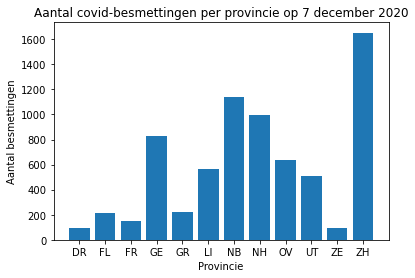

In [20]:
# Een staafdiagram om het aantal besmettingen per provincie te zien
plt.bar(prv_afk, prv_positief)
plt.ylabel("Aantal besmettingen")
plt.xlabel("Provincie")
plt.title("Aantal covid-besmettingen per provincie op 7 december 2020")
plt.show()

**Opdracht** Aan jullie de eer om te visualiseren hoe het aantal opnames en het aantal sterfgevallen er per provincie uitzien.

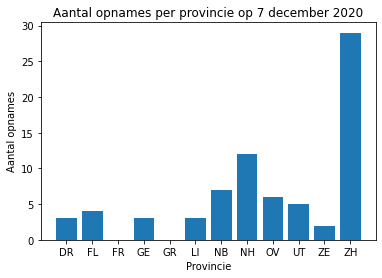

In [21]:
#Een staafdiagram om het aantal opnames per provincie te zien
plt.bar(prv_afk, prv_opgenomen)
plt.ylabel("Aantal opnames")
plt.xlabel("Provincie")
plt.title("Aantal opnames per provincie op 7 december 2020")
plt.show()

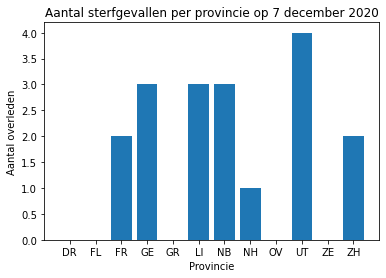

In [22]:
#Een staafdiagram om het aantal sterfgevallen per provincie te zien
plt.bar(prv_afk, prv_overleden)
plt.ylabel("Aantal overleden")
plt.xlabel("Provincie")
plt.title("Aantal sterfgevallen per provincie op 7 december 2020")
plt.show()

We willen natuurlijk  graag weten of er een relatie of een hoger aantal besmettingen verband houd met het aantal inwoners in een provincie. Om een indruk te krijgen van de relatie tussen twee variabelen kunnen we beter een spreidingsdiagram gebruiken. pyplot heeft daar gelukkig ook in voorzien met de method ```scatter()```. 

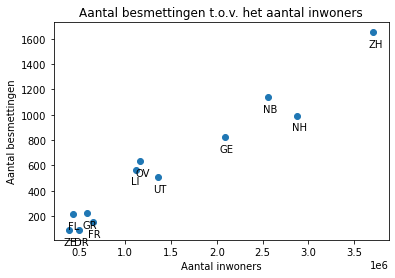

In [23]:
# Een diagram om de relatie tussen het aantal besmettingen en het aantal inwoners te onderzoeken
plt.scatter(prv_inwoners, prv_positief)
plt.xlabel("Aantal inwoners")
plt.ylabel("Aantal besmettingen")
plt.title("Aantal besmettingen t.o.v. het aantal inwoners")
# het stukje hierna wordt wat lastiger, hier wordt de afkorting van de provincienaam
# bij de punten in het diagram geplaats. In feite wordt de tekst op (x,y) coordinaten geplaatst
# en deze coordinaten worden gevormd door de waarde voor het aantal inwoners en de waarde voor
# het aantal besmettingen.
for label, inwoners, positief in zip(prv_afk, prv_inwoners, prv_positief):
    plt.annotate(label,
        xy= (inwoners, positief), # put the label with its point
        xytext=(-5, -15), # we verschuiven het coordinaat iets naar links en beneden, anders
                          # zou de tekst over het punt heen worden geschreven.
        textcoords='offset points')
plt.show()

Het lijkt er op dat er een relatie is tussen het aantal inwoners in een provincie en het aantal besmetting wat zich voor doet in die provincie. Uiteraard is er meer diepgaand (statistisch) onderzoek nodig om die conclusie echt te kunnen trekken...

**Opdracht** aan jullie de eer om inzichtelijk te maken of er een relatie bestaat tussen het aantal inwoners van 80 jaar en ouder en het aantal opnames. 

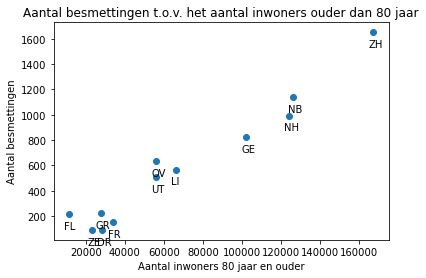

In [24]:
# Een diagram om de relatie tussen het aantal opnames en het aantal inwoners van 80 jaar en ouder te onderzoeken
plt.scatter(prv_inw_80_of_ouder, prv_positief)
plt.xlabel("Aantal inwoners 80 jaar en ouder")
plt.ylabel("Aantal besmettingen")
plt.title("Aantal besmettingen t.o.v. het aantal inwoners ouder dan 80 jaar")

for label, inwoners_80_plus, positief in zip(prv_afk, prv_inw_80_of_ouder, prv_positief):
    plt.annotate(label,
        xy= (inwoners_80_plus, positief), # put the label with its point
        xytext=(-5, -15), # we verschuiven het coordinaat iets naar links en beneden, anders
                          # zou de tekst over het punt heen worden geschreven.
        textcoords='offset points')
plt.show()

Uit het nieuws weten we dat 80-plussers tot de risicogroepen behoren, maar eigenlijk begint die groep al bij 65 jaar. We willen derhalve graag het verband zien tussen het aantal opnames en het aantal inwoners wat 65 jaar en ouder is. De data voor 65+ is echter verspreid over twee lists. Die zullen we moeten samenvoegen in een nieuwe list. We zullen de waardes voor 65-80 en 80+ per provincie bij elkaar op moeten tellen. Om dat voorelkaar te krijgen gaan we de lists die we willen optellen eerst met de ```zip()``` functie samenvoegen tot een data structuur met 12 rijen en 2 kolommen. Vervolgens kunnen we dan met een list comprehension voor elke provincie de twee kolommen optellen om zo de nieuwe list te maken.

In [25]:
prv_65_plus = list(x1 + x2 for x1, x2 in zip(prv_inw_65_tot_80, prv_inw_80_of_ouder))
print("prv_65_plus = ", prv_65_plus)

prv_65_plus =  [115285, 59783, 140773, 426100, 116735, 266845, 520662, 520253, 227104, 231599, 91438, 675978]


**Opdracht** aan jullie de eer om inzichtelijk te maken of er een relatie bestaat tussen het aantal inwoners van 65 jaar en ouder en het aantal opnames. Geef in een mark-up cel aan of de resultaten anders zijn dan bij de vorige analyse.

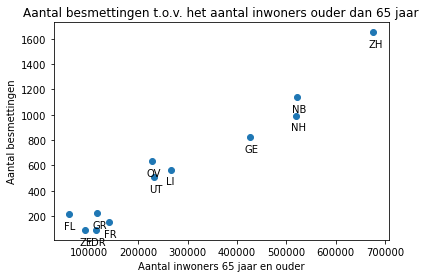

In [26]:
# Een diagram om de relatie tussen het aantal opnames
# en het aantal inwoners van 65 jaar en ouder te onderzoeken

plt.scatter(prv_65_plus, prv_positief)
plt.xlabel("Aantal inwoners 65 jaar en ouder")
plt.ylabel("Aantal besmettingen")
plt.title("Aantal besmettingen t.o.v. het aantal inwoners ouder dan 65 jaar")

for label, prv_65_plus, positief in zip(prv_afk, prv_65_plus, prv_positief):
    plt.annotate(label,
        xy= (prv_65_plus, positief), # put the label with its point
        xytext=(-5, -15), # we verschuiven het coordinaat iets naar links en beneden, anders
                          # zou de tekst over het punt heen worden geschreven.
        textcoords='offset points')
plt.show()

**Opdracht** Er wordt, met name sinds de zomervakantie, vaak gewezen naar de jeugd als "motor" van de verspreiding van Covid. Laat op basis van de beschikbare data zien of er een relatie bestaat tussen het aantal personen tussen de 15 en de 25 en het aantal besmettingen. Wordt de relatie anders wanneer we alleen naar de groep tussen 15 en 20 kijken?

**Opdracht** Eerder hebben we gekeken naar de relatie tussen het totaal aantal inwoners en het aantal besmettingen. Daar was een vrij duidelijk verband te zien. Een mogelijke verklaring is dat mensen in provincies met veel inwoners dichter op elkaar wonen en elkaar daardoor sneller besmetten. Maak een diagram die het verband laat zien tussen het aantal besmettingen en de bevolkingsdichtheid per provincie.

**Inleveren** Wanneer jullie de opdrachten als groep hebben afgerond kun je dit notebook downloaden en in canvas inleveren. Er hoeft maar één notebook per groep te worden ingeleverd!

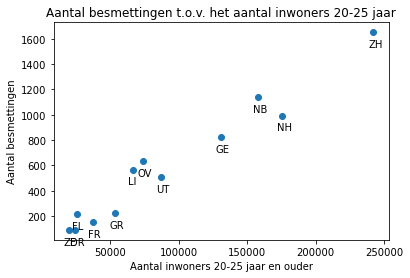

In [27]:
#relatie tussen 15-25 & aantal besmettingen. 
plt.scatter(prv_inw_20_tot_25, prv_positief)
plt.xlabel("Aantal inwoners 20-25 jaar en ouder")
plt.ylabel("Aantal besmettingen")
plt.title("Aantal besmettingen t.o.v. het aantal inwoners 20-25 jaar")

for label, inw_20_tot_25, positief in zip(prv_afk, prv_inw_20_tot_25, prv_positief):
    plt.annotate(label,
        xy= (inw_20_tot_25, positief), # put the label with its point
        xytext=(-5, -15), # we verschuiven het coordinaat iets naar links en beneden, anders
                          # zou de tekst over het punt heen worden geschreven.
        textcoords='offset points')
plt.show()


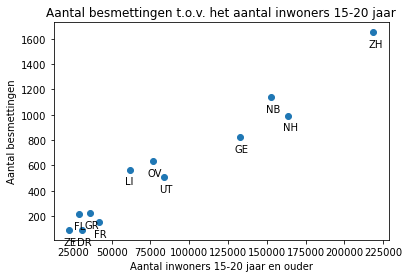

In [29]:
#relatie tussen 15-20 & aantal besmettingen. 
plt.scatter(prv_inw_15_tot_20, prv_positief)
plt.xlabel("Aantal inwoners 15-20 jaar en ouder")
plt.ylabel("Aantal besmettingen")
plt.title("Aantal besmettingen t.o.v. het aantal inwoners 15-20 jaar")

for label, inw_15_tot_20, positief in zip(prv_afk, prv_inw_15_tot_20, prv_positief):
    plt.annotate(label,
        xy= (inw_15_tot_20, positief), # put the label with its point
        xytext=(-5, -15), # we verschuiven het coordinaat iets naar links en beneden, anders
                          # zou de tekst over het punt heen worden geschreven.
        textcoords='offset points')
plt.show()
#conclusie: relatie is bijna hetzelfde tussen 15-20 & 20-25 jarige inwoners en aantal besmettingen

In [37]:
#prv_bevolkingsdichtheid = prv_oppervlakte/ prv_inwoners
prv_bevolkingsdichtheid = [x/y for x, y in zip(prv_oppervlakte, prv_inwoners)]
print(prv_bevolkingsdichtheid)

[0.5332683792400776, 0.3337021093515452, 0.5132062582601619, 0.2379599338815083, 0.39666749734580947, 0.19214268515692343, 0.19139782009438325, 0.09254401851415181, 0.2855258833832585, 0.10964073827494733, 0.46471858311081443, 0.07280429563382924]


In [40]:
#rond af op 2 decimalen per item in lijst
prv_bevolkingsdichtheid_rounded = [ '%.2f' % elem for elem in prv_bevolkingsdichtheid ]
print(prv_bevolkingsdichtheid_rounded)

['0.53', '0.33', '0.51', '0.24', '0.40', '0.19', '0.19', '0.09', '0.29', '0.11', '0.46', '0.07']


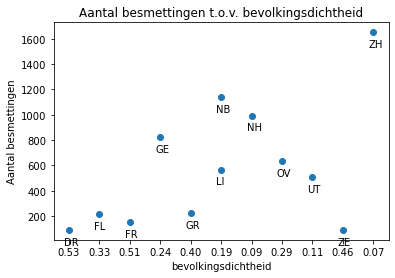

In [42]:
# bevolkingsdichtheid en aantal besmettingen 
#relatie tbevolkingsdichtheid & aantal besmettingen. 
plt.scatter(prv_bevolkingsdichtheid_rounded, prv_positief)
plt.xlabel("bevolkingsdichtheid") #hoe hoger het getal,hoe meer mensen per oppervlakte
plt.ylabel("Aantal besmettingen")
plt.title("Aantal besmettingen t.o.v. bevolkingsdichtheid")

for label, bevolkingsdichtheid, positief in zip(prv_afk, prv_bevolkingsdichtheid_rounded, prv_positief):
    plt.annotate(label,
        xy= (bevolkingsdichtheid, positief), # put the label with its point
        xytext=(-5, -15), # we verschuiven het coordinaat iets naar links en beneden, anders
                          # zou de tekst over het punt heen worden geschreven.
        textcoords='offset points')
plt.show()

#conclusie: provincie Zuid-Holland(=ZH) heeft het meeste aantal per oppervlakte. 
#hoe dichter je bij elkaar zit des te groter de kans dat je besmet raakt. 